# Exploratory Data Analysis

<b>Load Data</b>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("../datasets/data_pre_processing.csv")
df.sample(5)

,corpus_name,raw_sentence,clean_sentence_training,label,clean_sentence_EDA
86430,twitter sentiment analysis,so saddened by the news #prayfororlando #lovewins #sunday,saddened news prayfororlando lovewins sunday,non-risky,saddened news prayfororlando lovewins sunday
73887,twitter sentiment analysis,"#state of the #nation #sunday, june 12, 2016 the #observer #good #morning #australia and we've #tablet #news",state nation sunday june observer good morning australia tablet news,non-risky,state nation sunday june observer good morning australia tablet news
12574,measuring hate speech,@RealMAGASteve @TimBuckOhFive Now why isn't ICE standing at the door directing them to a semi trailer loading them all up and dropping them off back in Mexico. Come here legally like the millions of immigrants before you.,standing door directing semi trailer loading dropping back Mexico Come legally like million immigrant,non-risky,standing door directing semi trailer loading dropping back Mexico Come legally like million immigrant
49080,hate speech and offensive language,Goodnight bitches (with a lisp),Goodnight bitch lisp,non-risky,Goodnight bitch lisp
18763,measuring hate speech,THEY CAN BE WHOEVER YOU WANT TO BE IF I WAS A BOY I WOULD BE GAY AND I WOUKD STATE IT OUT TO EVERYONE I'm bi and I'm scared to come out to my parents,THEY WHOEVER WANT WOULD WOUKD STATE EVERYONE scared come parent,non-risky,THEY WHOEVER WANT WOULD WOUKD STATE EVERYONE scared come parent


In [2]:
df.shape

(93878, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93878 entries, 0 to 93877
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   corpus_name              93878 non-null  object
 1   raw_sentence             93878 non-null  object
 2   clean_sentence_training  93487 non-null  object
 3   label                    93878 non-null  object
 4   clean_sentence_EDA       93487 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


<b>Check Missing Value</b>

In [4]:
# percentage
((df.isna().sum()/df.shape[0])*100).round(2)

corpus_name                0.00
raw_sentence               0.00
clean_sentence_training    0.42
label                      0.00
clean_sentence_EDA         0.42
dtype: float64

In [5]:
# total
df.isna().sum()

corpus_name                  0
raw_sentence                 0
clean_sentence_training    391
label                        0
clean_sentence_EDA         391
dtype: int64

In [6]:
df.columns

Index(['corpus_name', 'raw_sentence', 'clean_sentence_training', 'label',
       'clean_sentence_EDA'],
      dtype='object')

In [7]:
df.dtypes

corpus_name                object
raw_sentence               object
clean_sentence_training    object
label                      object
clean_sentence_EDA         object
dtype: object

<b>Number of Characters</b>

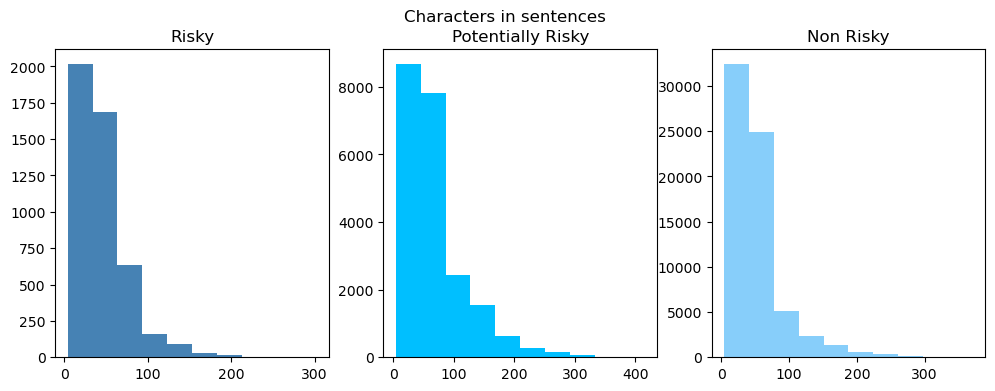

In [8]:
import matplotlib.pyplot as plt

fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(12,4))

dfca_len=df[df['label']=='risky']['clean_sentence_EDA'].str.len()
ax1.hist(dfca_len,color='steelblue')
ax1.set_title('Risky')

dfcb_len=df[df['label']=='potentially-risky']['clean_sentence_EDA'].str.len()
ax2.hist(dfcb_len,color='deepskyblue')
ax2.set_title('Potentially Risky')

dfcc_len=df[df['label']=='non-risky']['clean_sentence_EDA'].str.len()
ax3.hist(dfcc_len,color='lightskyblue')
ax3.set_title('Non Risky')

fig.suptitle('Characters in sentences')
plt.show()

<b>Number of Words</b>

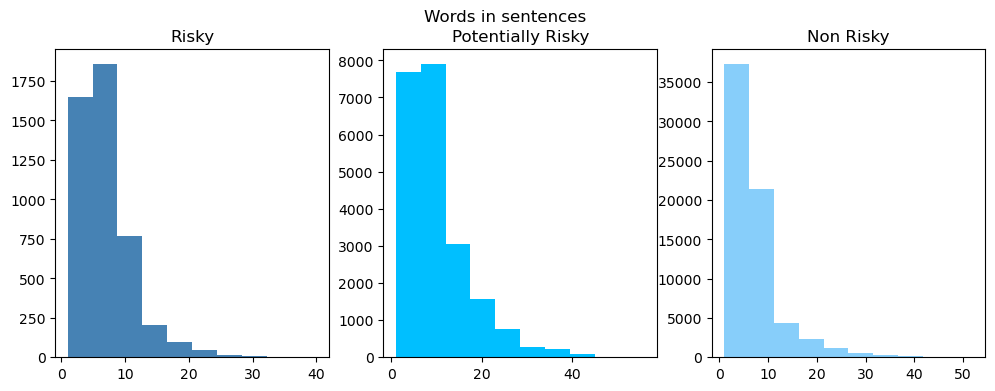

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))

dfwa_len=df[df['label']=='risky']['clean_sentence_EDA'].str.split().map(lambda x: len(x))
ax1.hist(dfwa_len,color='steelblue')
ax1.set_title('Risky')

dfwb_len=df[df['label']=='potentially-risky']['clean_sentence_EDA'].str.split().map(lambda x: len(x))
ax2.hist(dfwb_len,color='deepskyblue')
ax2.set_title('Potentially Risky')

dfwc_len=df[df['label']=='non-risky']['clean_sentence_EDA'].apply(str).str.split().map(lambda x: len(x))
ax3.hist(dfwc_len,color='lightskyblue')
ax3.set_title('Non Risky')

fig.suptitle('Words in sentences')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 0.98, 'Average word length in each sentence')

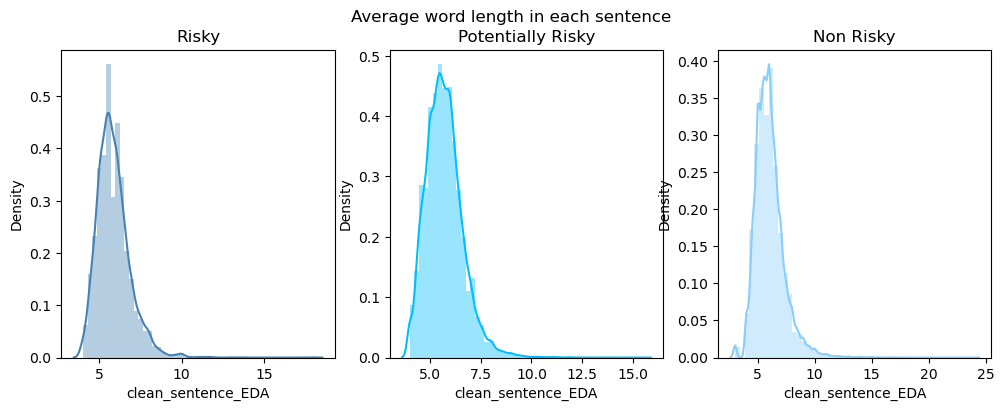

In [10]:
import seaborn as sns
import numpy as np

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))

wordaa=df[df['label']=='risky']['clean_sentence_EDA'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordaa.map(lambda x: np.mean(x)),ax=ax1,color='steelblue')
ax1.set_title('Risky')

wordab=df[df['label']=='potentially-risky']['clean_sentence_EDA'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordab.map(lambda x: np.mean(x)),ax=ax2,color='deepskyblue')
ax2.set_title('Potentially Risky')

wordac=df[df['label']=='non-risky']['clean_sentence_EDA'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax3,color='lightskyblue')
ax3.set_title('Non Risky')

fig.suptitle('Average word length in each sentence')

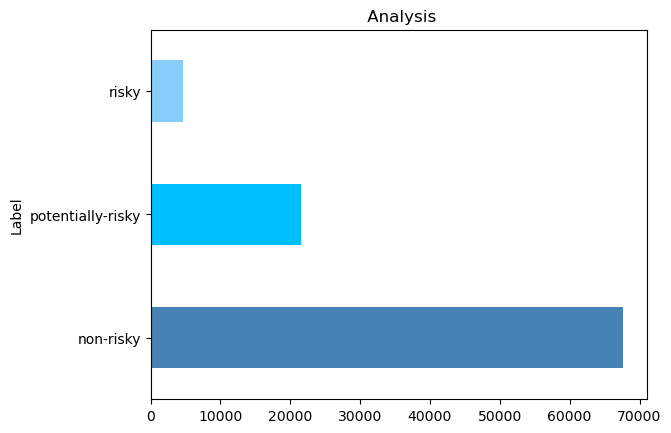

In [11]:
plt.title(" Analysis")

plt.ylabel("Label")
df["label"].value_counts().plot(kind="barh", color=['steelblue', 'deepskyblue', 'lightskyblue'])
plt.show()

In [12]:
df["label"].value_counts()

non-risky            67642
potentially-risky    21592
risky                 4644
Name: label, dtype: int64

In [13]:
df["label"].value_counts(normalize=True).to_frame().style.format('{:.6%}')

,label
non-risky,72.053090%
potentially-risky,23.000064%
risky,4.946846%


<b>Analyzing Top Words</b>

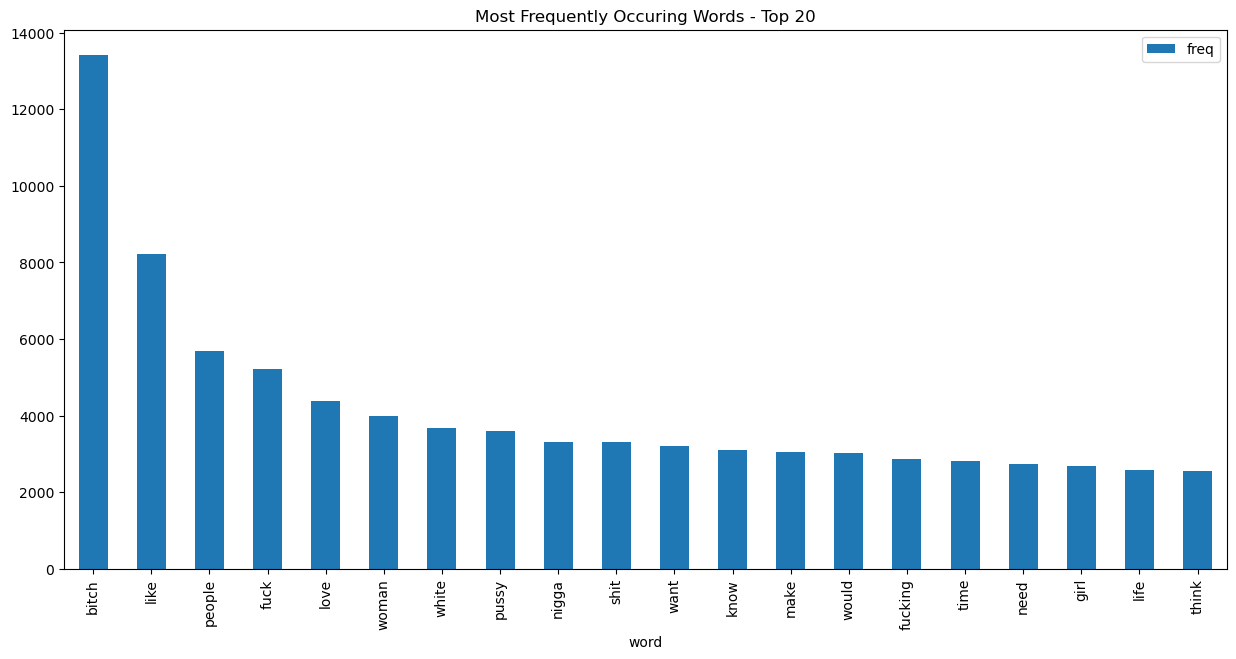

In [14]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words = cv.fit_transform(df.clean_sentence_EDA.values.astype('U'))

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [15]:
frequency.head(20)

,word,freq
0,bitch,13407
1,like,8207
2,people,5695
3,fuck,5209
4,love,4375
5,woman,4000
6,white,3668
7,pussy,3600
8,nigga,3317
9,shit,3297


<b>Wordclouds</b>

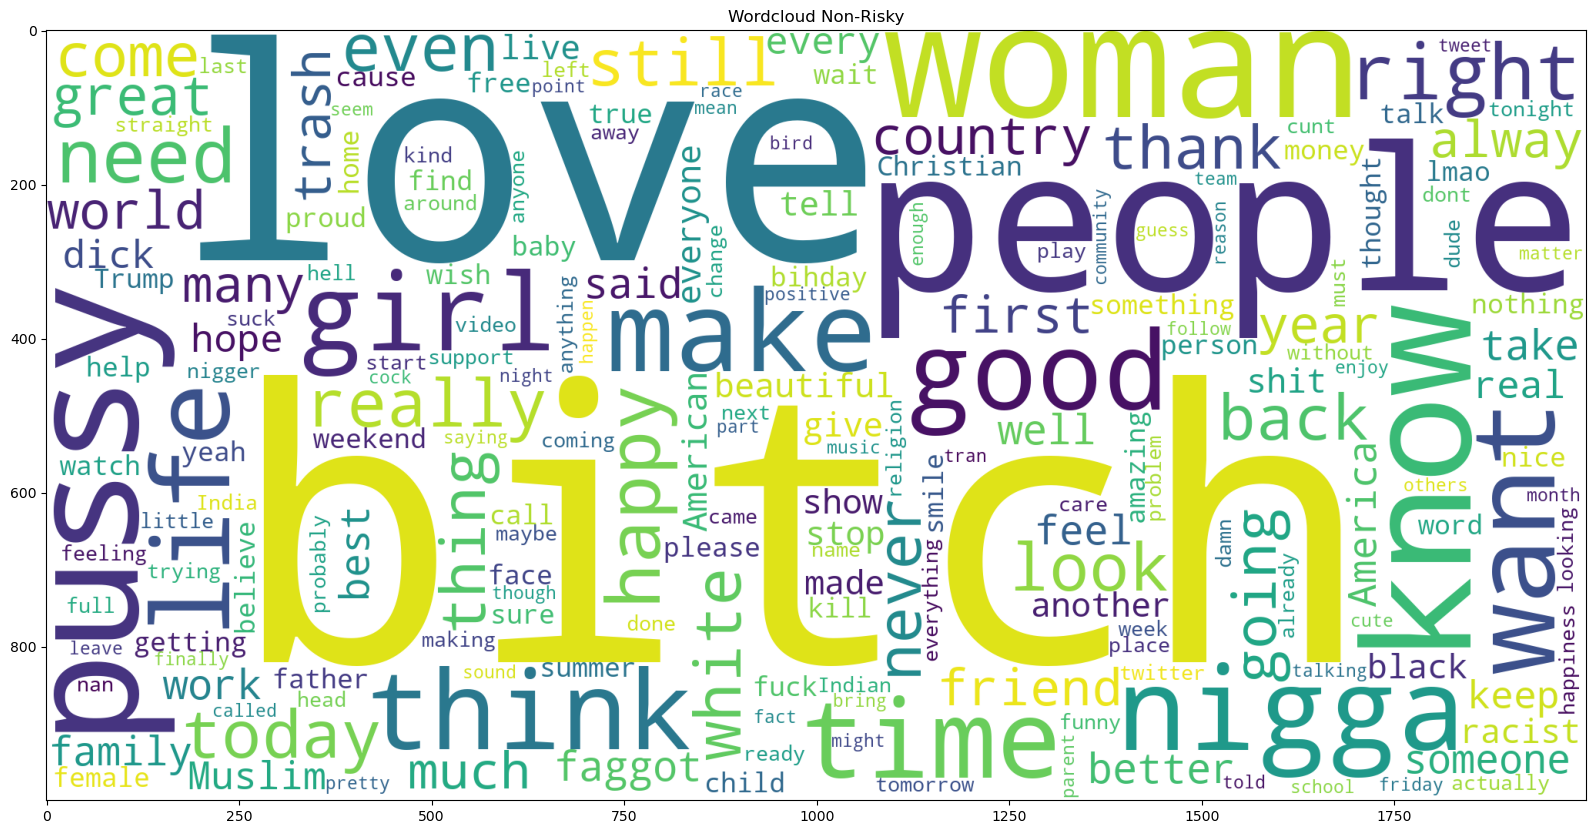

In [16]:
from wordcloud import WordCloud 

words = ' '.join([Text for Text in df[df['label']=='non-risky']['clean_sentence_EDA'].values.astype('U')])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Non-Risky")
plt.show()

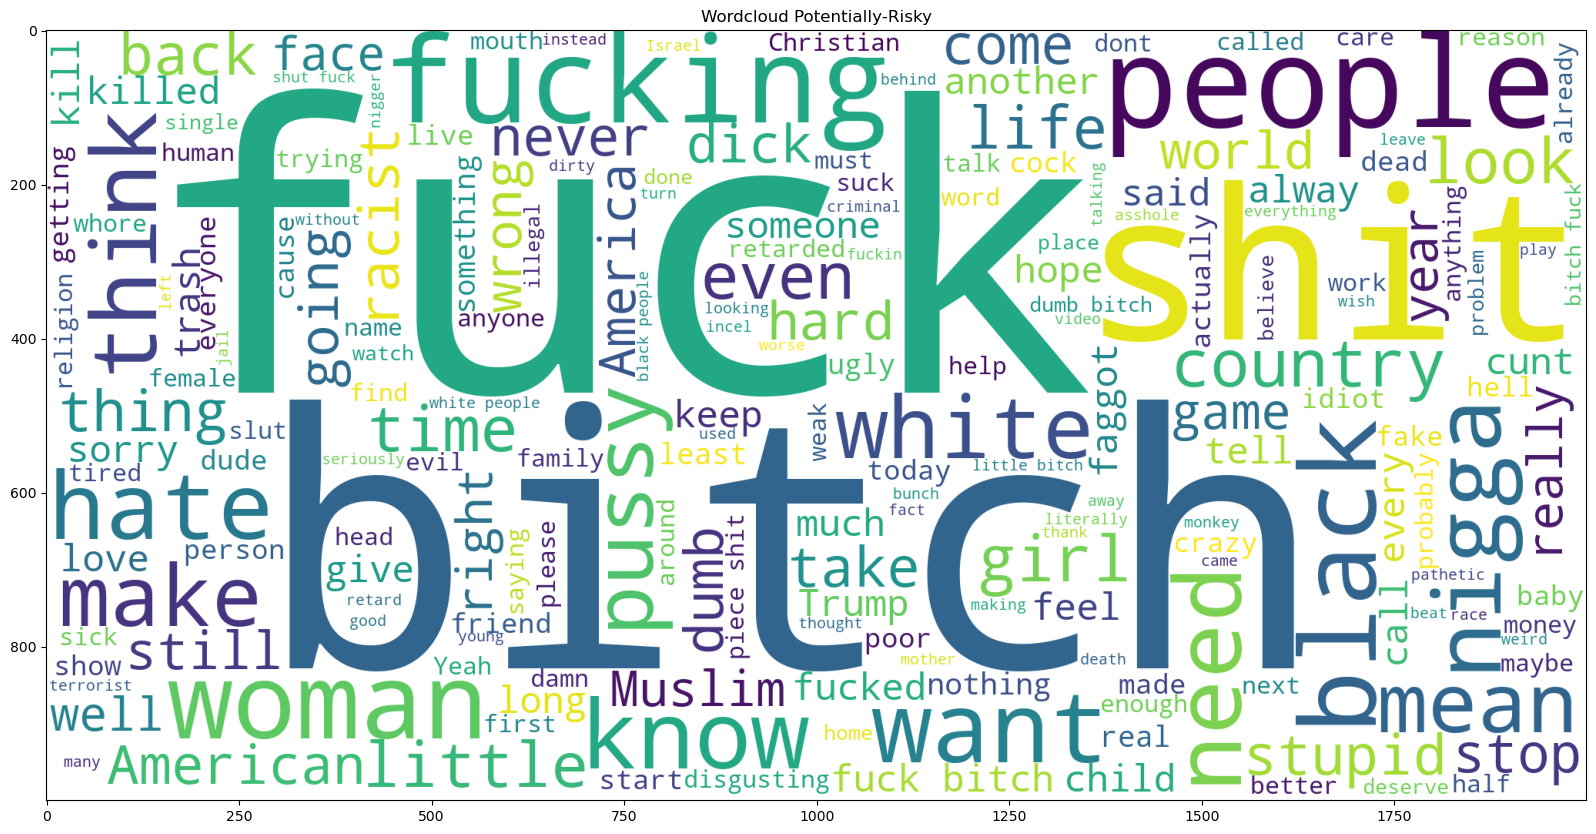

In [17]:
from wordcloud import WordCloud 

words = ' '.join([Text for Text in df[df['label']=='potentially-risky']['clean_sentence_EDA'].values.astype('U')])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Potentially-Risky")
plt.show()

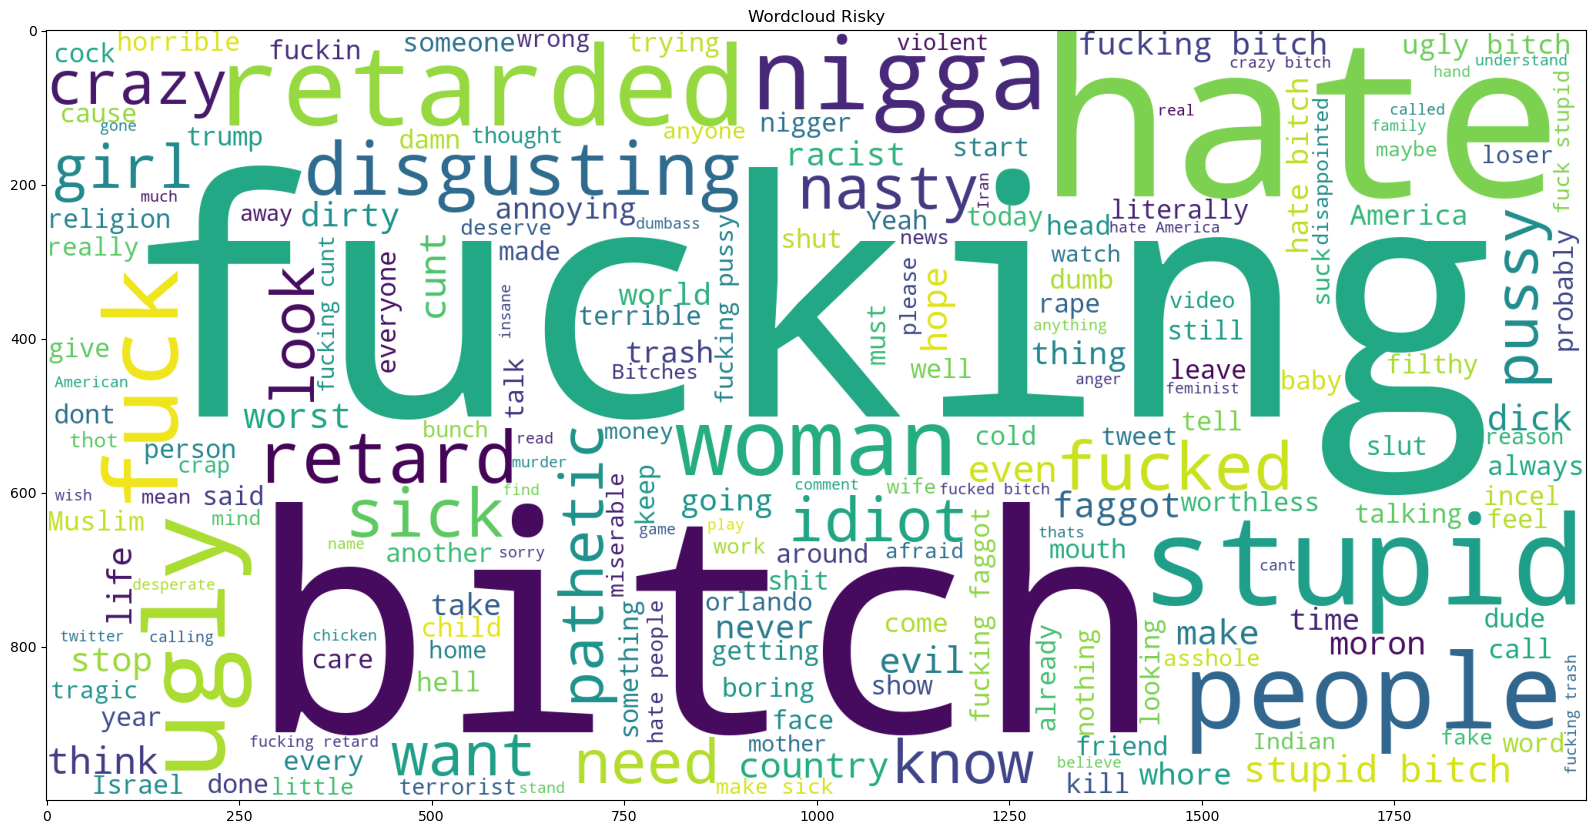

In [18]:
from wordcloud import WordCloud 

words = ' '.join([Text for Text in df[df['label']=='risky']['clean_sentence_EDA'].values.astype('U')])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Risky")
plt.show()

In [19]:
import nltk

nltk_tokens = nltk.word_tokenize(str(df['clean_sentence_EDA']))

list(nltk.bigrams(nltk_tokens))

[('0', 'indeed'),
 ('indeed', 'sort'),
 ('sort', 'reminds'),
 ('reminds', 'elder'),
 ('elder', 'lady'),
 ('lady', 'played'),
 ('played', 'part'),
 ('part', 'movie'),
 ('movie', 'Titanic'),
 ('Titanic', 'telling'),
 ('telling', 'story'),
 ('story', 'would'),
 ('would', 'wanted'),
 ('wanted', 'cover'),
 ('cover', 'really'),
 ('really', 'proud'),
 ('proud', 'race'),
 ('race', 'matter'),
 ('matter', '1'),
 ('1', 'trans'),
 ('trans', 'woman'),
 ('woman', 'reading'),
 ('reading', 'tweet'),
 ('tweet', 'right'),
 ('right', 'beautiful'),
 ('beautiful', '2'),
 ('2', 'Question'),
 ('Question', 'These'),
 ('These', 'broad'),
 ('broad', 'criticize'),
 ('criticize', 'America'),
 ('America', 'country'),
 ('country', 'flee'),
 ('flee', 'want'),
 ('want', 'make'),
 ('make', 'like'),
 ('like', 'THEIR'),
 ('THEIR', 'former'),
 ('former', 'HELL'),
 ('HELL', 'HOLE'),
 ('HOLE', 'think'),
 ('think', 'explain'),
 ('explain', 'GRATITUDE'),
 ('GRATITUDE', 'letting'),
 ('letting', '3'),
 ('3', 'time'),
 ('time',

In [20]:
import nltk

nltk_tokens = nltk.word_tokenize(str(df['clean_sentence_EDA']))

list(nltk.trigrams(nltk_tokens))

[('0', 'indeed', 'sort'),
 ('indeed', 'sort', 'reminds'),
 ('sort', 'reminds', 'elder'),
 ('reminds', 'elder', 'lady'),
 ('elder', 'lady', 'played'),
 ('lady', 'played', 'part'),
 ('played', 'part', 'movie'),
 ('part', 'movie', 'Titanic'),
 ('movie', 'Titanic', 'telling'),
 ('Titanic', 'telling', 'story'),
 ('telling', 'story', 'would'),
 ('story', 'would', 'wanted'),
 ('would', 'wanted', 'cover'),
 ('wanted', 'cover', 'really'),
 ('cover', 'really', 'proud'),
 ('really', 'proud', 'race'),
 ('proud', 'race', 'matter'),
 ('race', 'matter', '1'),
 ('matter', '1', 'trans'),
 ('1', 'trans', 'woman'),
 ('trans', 'woman', 'reading'),
 ('woman', 'reading', 'tweet'),
 ('reading', 'tweet', 'right'),
 ('tweet', 'right', 'beautiful'),
 ('right', 'beautiful', '2'),
 ('beautiful', '2', 'Question'),
 ('2', 'Question', 'These'),
 ('Question', 'These', 'broad'),
 ('These', 'broad', 'criticize'),
 ('broad', 'criticize', 'America'),
 ('criticize', 'America', 'country'),
 ('America', 'country', 'flee'),
